# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress

from api_keys import weather_api_key 
from citipy import citipy

In [3]:
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"

In [25]:
#city_data = pd.read_csv("../output_data/cities.csv")
#city_data.head()

## Generate Cities List

In [4]:
#setup lists for loop
coordinates = []
city_list = []

#find 500+ cities
lats = np.random.uniform(low=-90.000, high=90.000, size=1300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1300)
coordinates = zip(lats, lngs)

#loop through citipy
for coordinates in coordinates:
    rand_city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name

    if rand_city not in city_list:
        city_list.append(rand_city)

In [43]:
rand_city

'east london'

In [38]:
len(city_list)

548

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [123]:
#city_data.columns

Index(['City_ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat',
       'Lng', 'Max Temp', 'Wind Speed', 'Humidity (%)'],
      dtype='object')

In [7]:
city_name= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [50]:
set_count = 1
record = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 

print('Beginning Data Retrieval')
print('------------------------')

for city in city_list:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    response = requests.get(query_url).json()
    
    if record < 50:
        record += 1
    else:
        set_count += 1
        record = 1

    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    try:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
    except:
        print("City not found. Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | kharp
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | springdale
Processing Record 6 of Set 1 | brae
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | ischia
Processing Record 9 of Set 1 | ust-kut
Processing Record 10 of Set 1 | laguna
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | puerto narino
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | alugan
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | adelaide
Processing Record 19 of Set 1 | whithorn
Processing Record 20 of Set 1 | narsaq
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | poso
Processing Record 23 of Set 1 | ampanihy
Proces

Processing Record 36 of Set 4 | vardo
Processing Record 37 of Set 4 | krasnoselkup
Processing Record 38 of Set 4 | pevek
Processing Record 39 of Set 4 | koumac
Processing Record 40 of Set 4 | kafanchan
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | paraiso
Processing Record 48 of Set 4 | arcangel
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | pangai
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | senno
Processing Record 4 of Set 5 | honningsvag
Processing Record 5 of Set 5 | sinnamary
Processing Record 6 of Set 5 | vanavara
Processing Record 7 of Set 5 | barstow
Processing Record 8 of Set 5 | carnarvon
Processing Rec

Processing Record 30 of Set 8 | rungata
City not found. Skipping...
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | bowen
Processing Record 33 of Set 8 | ponta do sol
Processing Record 34 of Set 8 | polson
Processing Record 35 of Set 8 | saint-georges
Processing Record 36 of Set 8 | riyadh
Processing Record 37 of Set 8 | voi
Processing Record 38 of Set 8 | linjiang
Processing Record 39 of Set 8 | disna
Processing Record 40 of Set 8 | altay
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | xichang
Processing Record 43 of Set 8 | boma
Processing Record 44 of Set 8 | kalnciems
Processing Record 45 of Set 8 | slave lake
Processing Record 46 of Set 8 | ilam
Processing Record 47 of Set 8 | roma
Processing Record 48 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 49 of Set 8 | vicuna
Processing Record 50 of Set 8 | sawtell
Processing Record 1 of Set 9 | mayo
Processing Record 2 of Set 9 | fortu

['taolanaro',
 'kharp',
 'torbay',
 'kapaa',
 'springdale',
 'brae',
 'busselton',
 'ischia',
 'ust-kut',
 'laguna',
 'tasiilaq',
 'puerto narino',
 'rikitea',
 'hilo',
 'alugan',
 'saskylakh',
 'butaritari',
 'adelaide',
 'whithorn',
 'narsaq',
 'hermanus',
 'poso',
 'ampanihy',
 'diffa',
 'ushuaia',
 'lagoa',
 'cooma',
 'grindavik',
 'hirara',
 'villa carlos paz',
 'port macquarie',
 'bluff',
 'barrow',
 'thompson',
 'pitkyaranta',
 'bethel',
 'ahumada',
 'vaini',
 'vostok',
 'constitucion',
 'bengkulu',
 'vestmannaeyjar',
 'cerritos',
 'yellowknife',
 'tasbuget',
 'ilulissat',
 'wamba',
 'saint-augustin',
 'georgetown',
 'illoqqortoormiut',
 'nouadhibou',
 'cheuskiny',
 'kampot',
 'talnakh',
 'moree',
 'buraydah',
 'avarua',
 'mahebourg',
 'arman',
 'loksa',
 'santiago del estero',
 'port hedland',
 'mar del plata',
 'cherskiy',
 'latung',
 'beringovskiy',
 'kavieng',
 'jamestown',
 'faanui',
 'bairiki',
 'kasempa',
 'norman wells',
 'upernavik',
 'jining',
 'leh',
 'springbok',
 'p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
weather_df = pd.DataFrame({"City": city_name, "Country": country, "Date": date,
                          "Latitude": lat, "Longitude": lng, "Cloudiness": cloudiness,
                          "Humidity": humidity, "Max Temperature": max_temp, "Wind Speed": wind_speed})

weather_df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,East London,ZA,1601357908,-33.02,27.91,17,58,57.20,13.87
1,East London,ZA,1601357908,-33.02,27.91,17,58,57.20,13.87
2,East London,ZA,1601357908,-33.02,27.91,17,58,57.20,13.87
3,East London,ZA,1601357908,-33.02,27.91,17,58,57.20,13.87
4,East London,ZA,1601357908,-33.02,27.91,17,58,57.20,13.87
...,...,...,...,...,...,...,...,...,...
2687,Gerāsh,IR,1601359972,27.67,54.14,0,37,86.00,4.70
2688,Quatre Cocos,MU,1601359973,-20.21,57.76,75,73,78.01,9.17
2689,Ola,RU,1601359973,59.58,151.28,100,84,45.18,7.31
2690,Los Alamos,US,1601359973,35.89,-106.31,1,36,46.40,4.70


In [53]:
weather_df['City'].value_counts()

East London       2193
Seidu                1
Meulaboh             1
Fukuechō             1
Saint-Augustin       1
                  ... 
Kasempa              1
Verkhovazh'ye        1
Chokurdakh           1
Shimoda              1
Huron                1
Name: City, Length: 500, dtype: int64

In [54]:
weather_df = weather_df.drop_duplicates(['City'])

In [55]:
weather_df.count()

City               500
Country            500
Date               500
Latitude           500
Longitude          500
Cloudiness         500
Humidity           500
Max Temperature    500
Wind Speed         500
dtype: int64

In [56]:
weather_df.describe()

,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.601360e+09,19.405880,23.791500,52.196000,71.248000,64.550560,7.981200
std,1.235029e+02,33.528458,92.149101,37.861809,20.855032,16.945158,5.092814
min,1.601358e+09,-54.800000,-179.170000,0.000000,9.000000,12.990000,0.310000
25%,1.601360e+09,-8.122500,-57.975000,16.750000,60.000000,51.800000,4.137500
50%,1.601360e+09,22.715000,27.585000,51.500000,74.000000,66.990000,6.930000
75%,1.601360e+09,47.905000,107.325000,90.000000,87.000000,78.800000,10.480000
max,1.601360e+09,78.220000,179.320000,100.000000,100.000000,100.400000,26.400000


In [58]:
weather_df.to_csv("Outputs/weather_df.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [59]:
humidity_df = weather_df.loc[weather_df['Humidity'] > 100]
humidity_df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed


In [60]:
#  Get the indices of cities that have humidity over 100%.
humidity_df.index

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

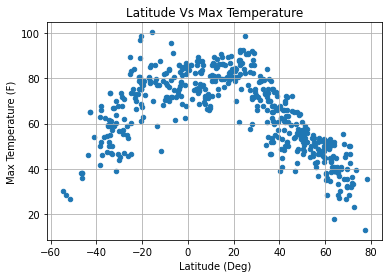

In [66]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Max Temperature')
plt.title('Latitude Vs Max Temperature')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Max Temperature (F)')
plt.grid()

## Latitude vs. Humidity Plot

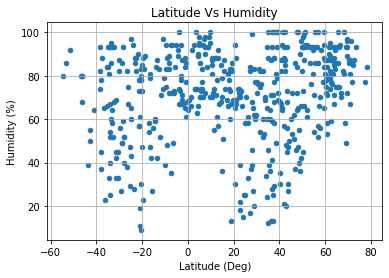

In [67]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Humidity')
plt.title('Latitude Vs Humidity')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Humidity (%)')
plt.grid()

## Latitude vs. Cloudiness Plot

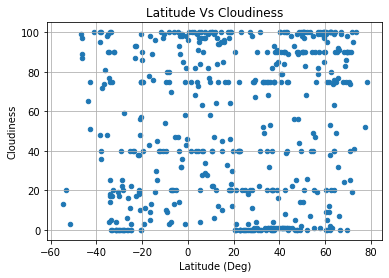

In [68]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Cloudiness')
plt.title('Latitude Vs Cloudiness')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Cloudiness')
plt.grid()

## Latitude vs. Wind Speed Plot

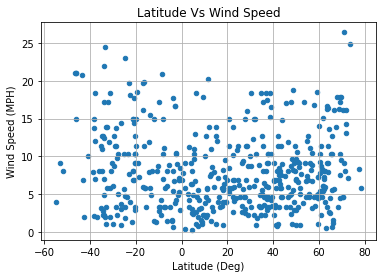

In [69]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Wind Speed')
plt.title('Latitude Vs Wind Speed')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Wind Speed (MPH)')
plt.grid()

## Linear Regression

In [127]:
#create hemisphere dataframes

north_df = weather_df.loc[weather_df['Latitude']>0]
south_df = weather_df.loc[weather_df['Latitude']<0]

x_val.count

<bound method Series.count of 2192    39.78
2193    64.99
2194    80.60
2195    51.80
2196    51.80
        ...  
2686    70.56
2687    86.00
2689    45.18
2690    46.40
2691    53.60
Name: Max Temperature, Length: 343, dtype: float64>

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: x and y must have same first dimension, but have shapes (343,) and (1,)

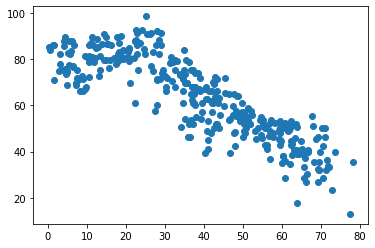

In [133]:
x_val = north_df['Latitude']
y_val = north_df['Max Temperature']

(slope, intercept, r, p, stderr) = linregress(x_val, y_val)

reg_val = x_val * slope + intercept

plt.scatter(x_val,y_val)
plt.plot(x_val, r)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [131]:
r

-0.8614426923036151

The r-value is: 0.6082708688906918


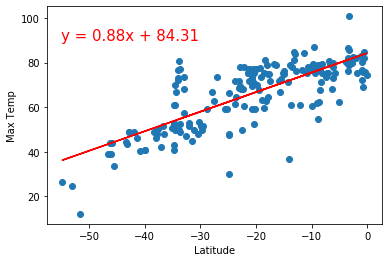

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


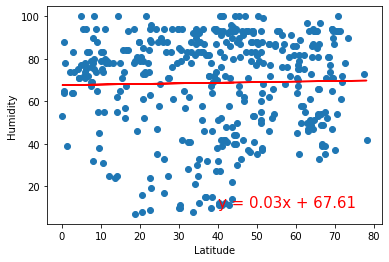

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


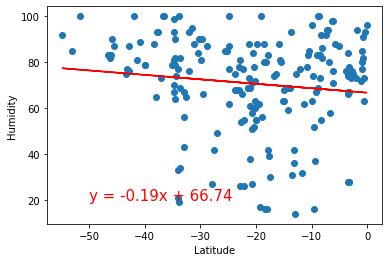

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


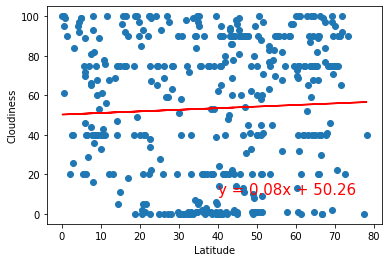

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


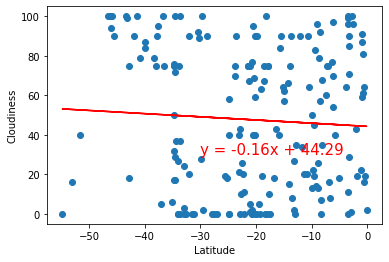

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


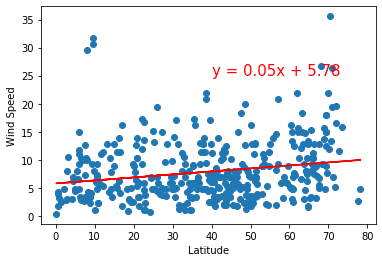

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


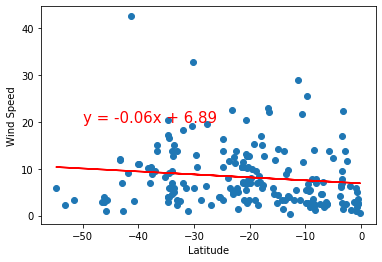